<a href="https://colab.research.google.com/github/iotanalytics/IoTTutorial/blob/main/code/regression_and_characterization/matched_filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In signal processing, a matched filter is obtained by correlating a known delayed signal, or template, with an unknown signal to detect the presence of the template in the unknown signal. This is equivalent to convolving the unknown signal with a conjugated time-reversed version of the template. The matched filter is the optimal linear filter for maximizing the signal-to-noise ratio (SNR) in the presence of additive stochastic noise. Matched filters are commonly used in radar, in which a known signal is sent out, and the reflected signal is examined for common elements of the out-going signal. Pulse compression is an example of matched filtering. It is so called because the impulse response is matched to input pulse signals. Two-dimensional matched filters are commonly used in image processing, e.g., to improve the SNR of X-ray observations. Matched filtering is a demodulation technique with LTI (linear time invariant) filters to ***maximize SNR***. It was originally also known as a North filter.

### Pros and cons:
For the filter, we couldn't really say the disadvantage of it but the limitation. We choose the suitable filter for different applications.
#####Pros: 
  The Matched Filter Technique is very important in communication as it is an good filtering technique which maximizes the signal to noise ratio (SNR). It is a linear filter and prior knowledge of the primary user signal is very essential for its operation.

#####Cons:
1. The matched filter is highly related to the original signal. As how it’s been named, you have to match the original signal with it in terms of the shape and the length. Different original signal, different matched filter.
2. The matched filter is concerned with how to find the target echo in the signal with noise, and does not care whether the signal waveform is distorted. Therefore, the matched filter cannot be used for waveform estimation. For waveform estimation, Wiener filtering or Kalman filtering should be used.



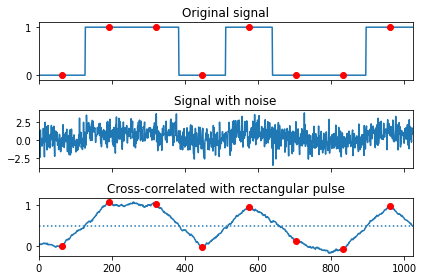

In [ ]:
# This code example shows how to use the signal module in scipy to implement a
# simple matched filter.
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

sig = np.repeat([0., 1., 1., 0., 1., 0., 0., 1.], 128)
sig_noise = sig + np.random.randn(len(sig))
corr = signal.correlate(sig_noise, np.ones(128), mode='same') / 128

clock = np.arange(64, len(sig), 128)
fig, (ax_orig, ax_noise, ax_corr) = plt.subplots(3, 1, sharex=True)
ax_orig.plot(sig)
ax_orig.plot(clock, sig[clock], 'ro')
ax_orig.set_title('Original signal')
ax_noise.plot(sig_noise)
ax_noise.set_title('Signal with noise')
ax_corr.plot(corr)
ax_corr.plot(clock, corr[clock], 'ro')
ax_corr.axhline(0.5, ls=':')
ax_corr.set_title('Cross-correlated with rectangular pulse')
ax_orig.margins(0, 0.1)
fig.tight_layout()
fig.show()
